# 5 Minute Tutorial Series

## Working with Yourself and Other Users

In [31]:
import os
import tempfile
import requests
from arcgis.gis import GIS

## The `UserManager`

The manager allows for controlling of users

- Items
- Profile
- Groups
- Folders


### Working with Yourself!

- the easiest way to gain access to yourself is to access the `me` property
- this requires an authenticated `GIS` user

In [37]:
gis = GIS(profile='my_demo_account')

In [38]:
me = gis.users.me
me

<User username:demo_user_account>

#### `me` is a `User` Class

- The `User` object provides all the information you need to know about the account
    + access to license type
    + roles
    + content
    + folder
    + groups owned by you
    + items owned by you

**this account owns nothing :(**

#### Create a Folder

Much like an operating system, `ArcGIS Online and Enterprise` can store content in folders

In [74]:
folder = gis.content.create_folder('museums')
folder

{'username': 'demo_user_account',
 'id': '6f33df4427b0482194adc7a384f6d56d',
 'title': 'museums'}

In [75]:
me.folders

[{'username': 'demo_user_account',
  'id': '6f33df4427b0482194adc7a384f6d56d',
  'title': 'museums',
  'created': 1585056526000}]

#### Add Content to the User's Folder

In [45]:
url = "https://data.cityofnewyork.us/api/views/fn6f-htvy/rows.csv?accessType=DOWNLOAD"
with tempfile.TemporaryDirectory() as tmpdir:
    fp = os.path.join(tmpdir, 'nyc_musaems.csv')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(fp, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
    ## Add the content!
    item = gis.content.add(item_properties={
            'title' : "NYC Museums Data",
            'type' : "CSV",
            'tags' : "Open Data, CSV, Museum, NYC, New York, New York City",
            'description' : "Locations of New York City Museums"
        }, 
        data=fp,
        folder='museums')
item

<Item title:"NYC Museums Data" type:CSV owner:demo_user_account>

#### Publish The `Museums`

In [47]:
pitem = item.publish({'name' : "NYC_Museums"}, {"Address":"LOCATION"})
pitem

<Item title:"NYC Museums Data" type:Feature Layer Collection owner:demo_user_account>

#### Track User Item's Create and Modified Time

In [64]:
import datetime
items = {}
folders = [fld['title'] for fld in me.folders] + [None]
for folder in folders:
    for item in me.items(folder):
        created_date = datetime.datetime.fromtimestamp(item.created/1000)
        mod_date = datetime.datetime.fromtimestamp(item.modified/1000)
        items[item.title] = {'item' : item, 'created' : created_date, 'modified' : mod_date}
        
items

{'NYC Museums Data': {'item': <Item title:"NYC Museums Data" type:Feature Layer Collection owner:demo_user_account>,
  'created': datetime.datetime(2020, 3, 24, 9, 1, 35),
  'modified': datetime.datetime(2020, 3, 24, 9, 1, 45)}}

#### Update User Profile

<User username:demo_user_account>
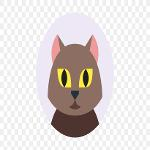

In [68]:
with tempfile.TemporaryDirectory() as tmpdir:
    url = "https://img.favpng.com/13/0/13/cat-computer-icons-user-profile-avatar-png-favpng-0aXfSAjB7FwDVpeuUDXvWRLzd.jpg"
    r = requests.get(url)
    with open("./cat_profile.jpg", 'wb') as writer:
        writer.write(r.content)
    me.update(thumbnail="./cat_profile.jpg")
me